### <h1> Task 4 <h1> (Перемножение двух квадратных матриц Ленточным методом и Методом Фокса)

In [17]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot
from doExperiments import DoExperiments

In [18]:
from pathlib import Path
import os


PATHS_TO_MPI = [Path("D:\\Projects\\CLion_Projects\\Projects_MPI\\cmake-build-debug\\openmpi_matrixStrip.exe"), 
               Path("D:\\Projects\\CLion_Projects\\Projects_MPI\\cmake-build-debug\\openmpi_matrixFox.exe")]
FILE_NAMES = ['data/OpenMPI/matrix_strip.csv', 'data/OpenMPI/matrix_fox.csv']


# args_in_right_order=[fill matrix mode] - "ones" or "random"
for i, PATH_TO_MPI in enumerate(PATHS_TO_MPI):
    if not os.path.exists(FILE_NAMES[i]):
        exp = DoExperiments(exe_path=PATH_TO_MPI, 
                            from_iters=100, to_iters=1000, 
                            iter_step=100, step_mode="+",
                            args_in_right_order=["random"])
        exp.run(filename=FILE_NAMES[i])
    else:
        print(f"File '{FILE_NAMES[i]}' already exists. Skipping function execution.")

File 'data/OpenMPI/matrix_strip.csv' already exists. Skipping function execution.
File 'data/OpenMPI/matrix_fox.csv' already exists. Skipping function execution.


In [19]:
data_strip = pd.read_csv('data/OpenMPI/matrix_strip.csv')
data_strip = data_strip.loc[data_strip['Num_Threads'].isin([1, 4, 9, 16]) == True]
data_fox = pd.read_csv('data/OpenMPI/matrix_fox.csv')
data_strip.dropna(inplace=True)
data_fox.dropna(inplace=True)
display(data_strip)
display(data_fox)

,Num_Threads,Iter,Time
0,1,100,4676.4
3,4,100,3644.0
16,1,200,29004.3
19,4,200,19083.5
32,1,300,111678.0
35,4,300,54680.0
48,1,400,228111.0
51,4,400,97034.3
63,16,400,99607.0
64,1,500,487333.0


,Num_Threads,Iter,Time
0,1,100,8479.6
3,4,100,6631.5
15,16,100,12650.4
16,1,200,31704.7
19,4,200,19675.1
31,16,200,26074.7
32,1,300,112123.0
35,4,300,50026.1
40,9,300,45887.9
47,16,300,59424.6


In [20]:
labels = ['Strip', 'Fox']

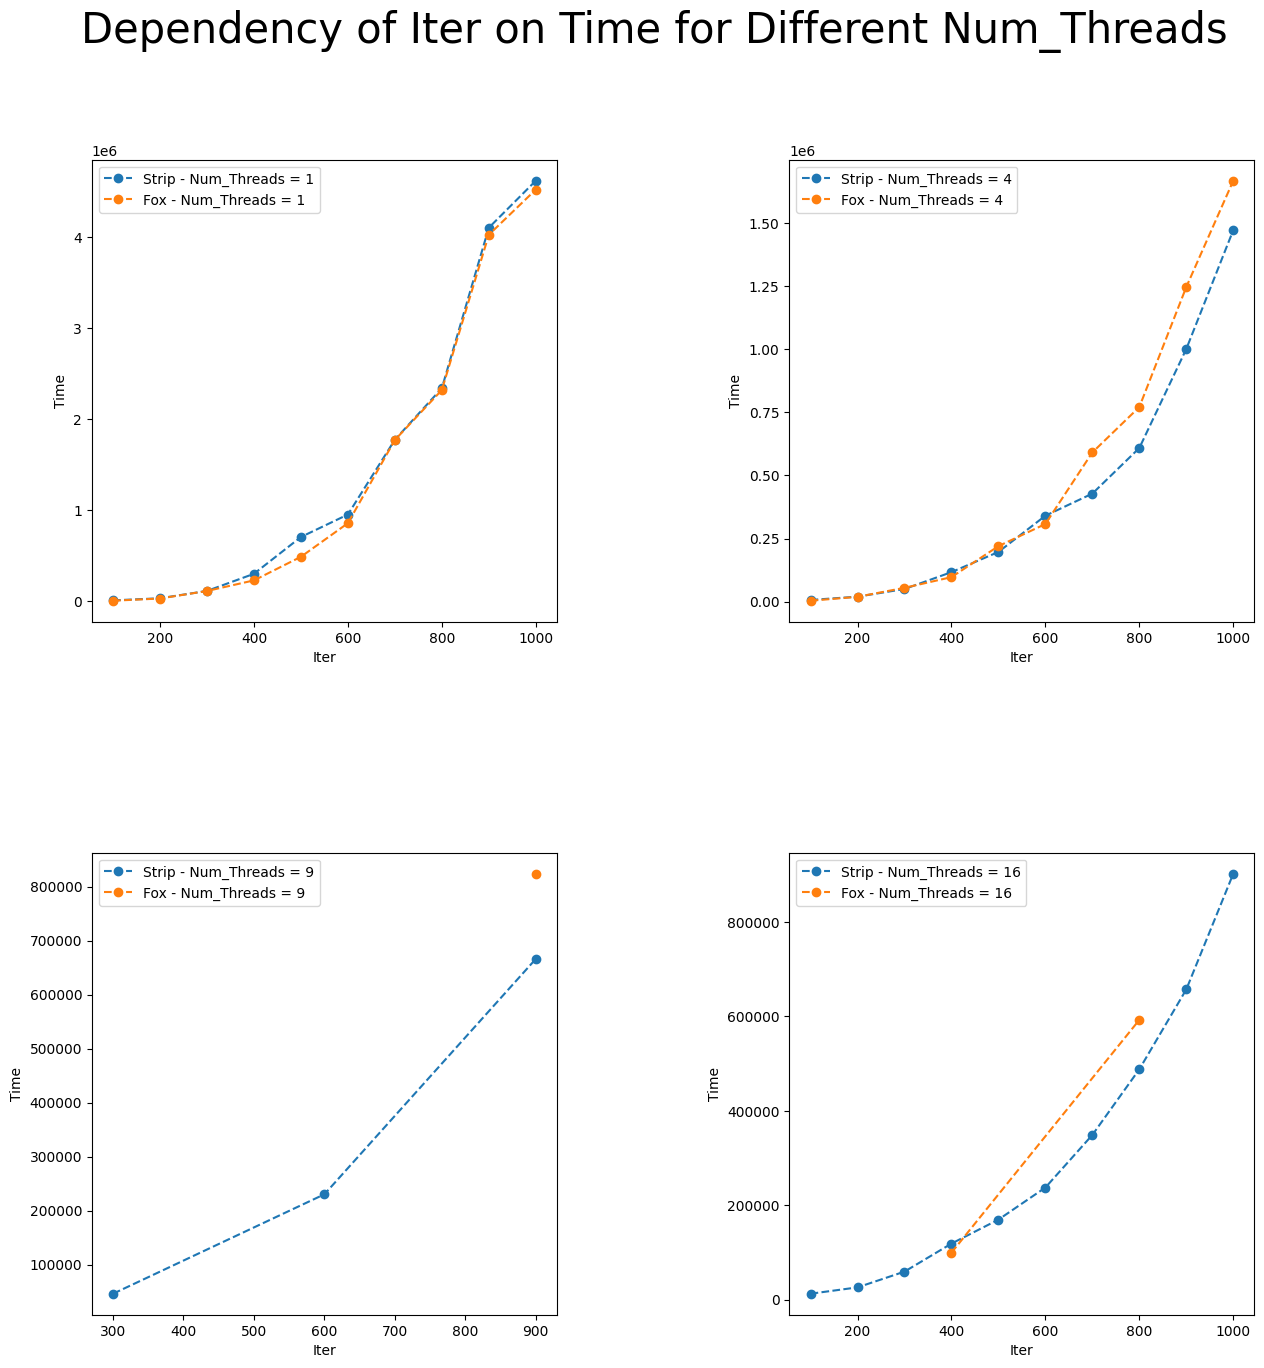

In [21]:
thread_groups_strip = data_strip.groupby('Num_Threads')
thread_groups_fox = data_fox.groupby('Num_Threads')

thread_groups = [thread_groups_fox, thread_groups_strip]
time_iter_plot(thread_groups, labels)

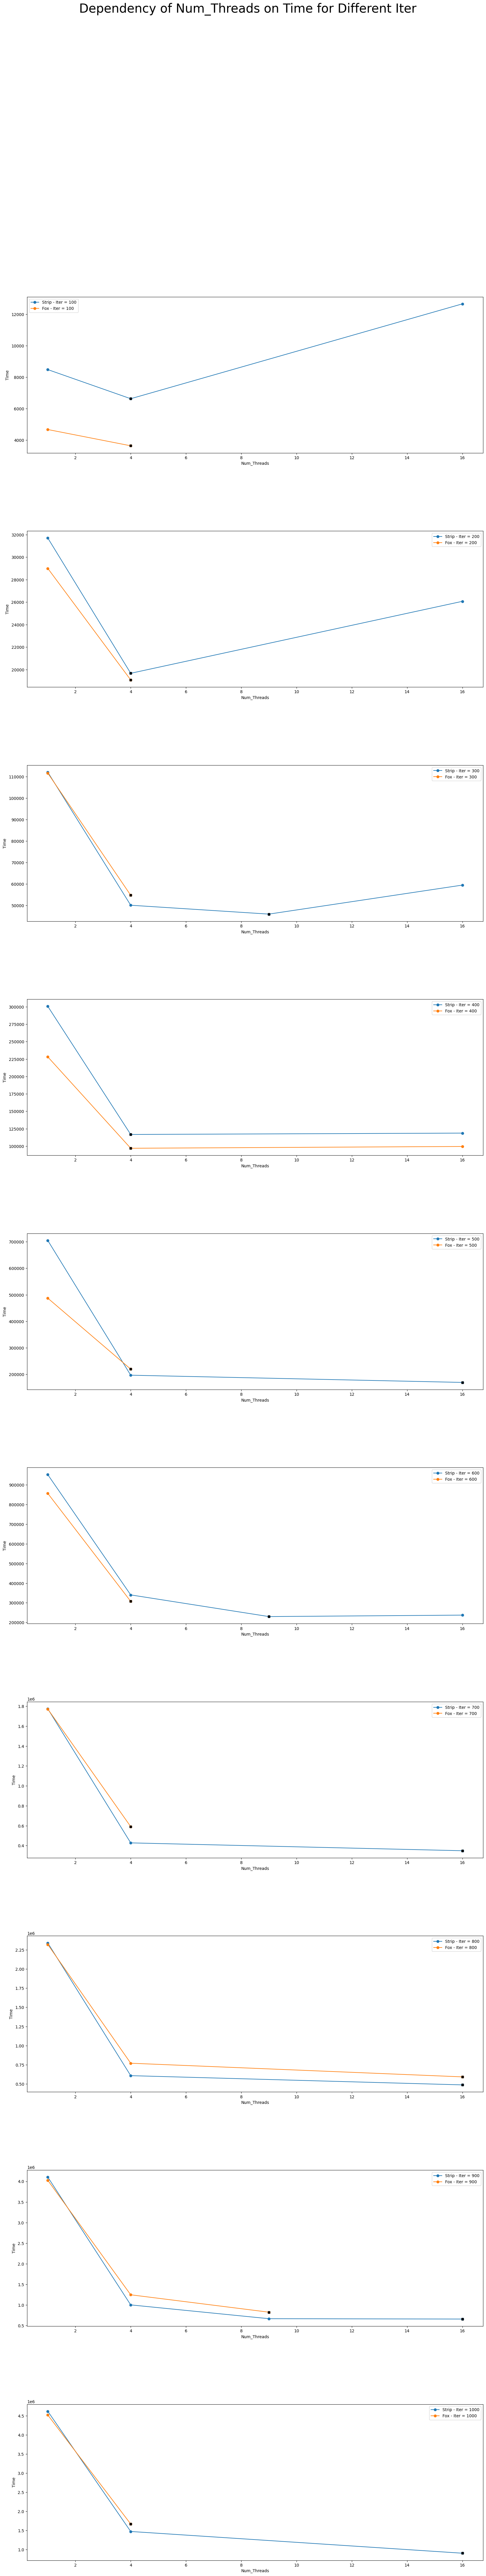

In [22]:
iter_groups_strip = data_strip.groupby('Iter', as_index=False)
iter_groups_fox = data_fox.groupby('Iter', as_index=False)

iter_groups = [iter_groups_fox, iter_groups_strip]
time_thread_plot(iter_groups, labels, size=(20, 100))

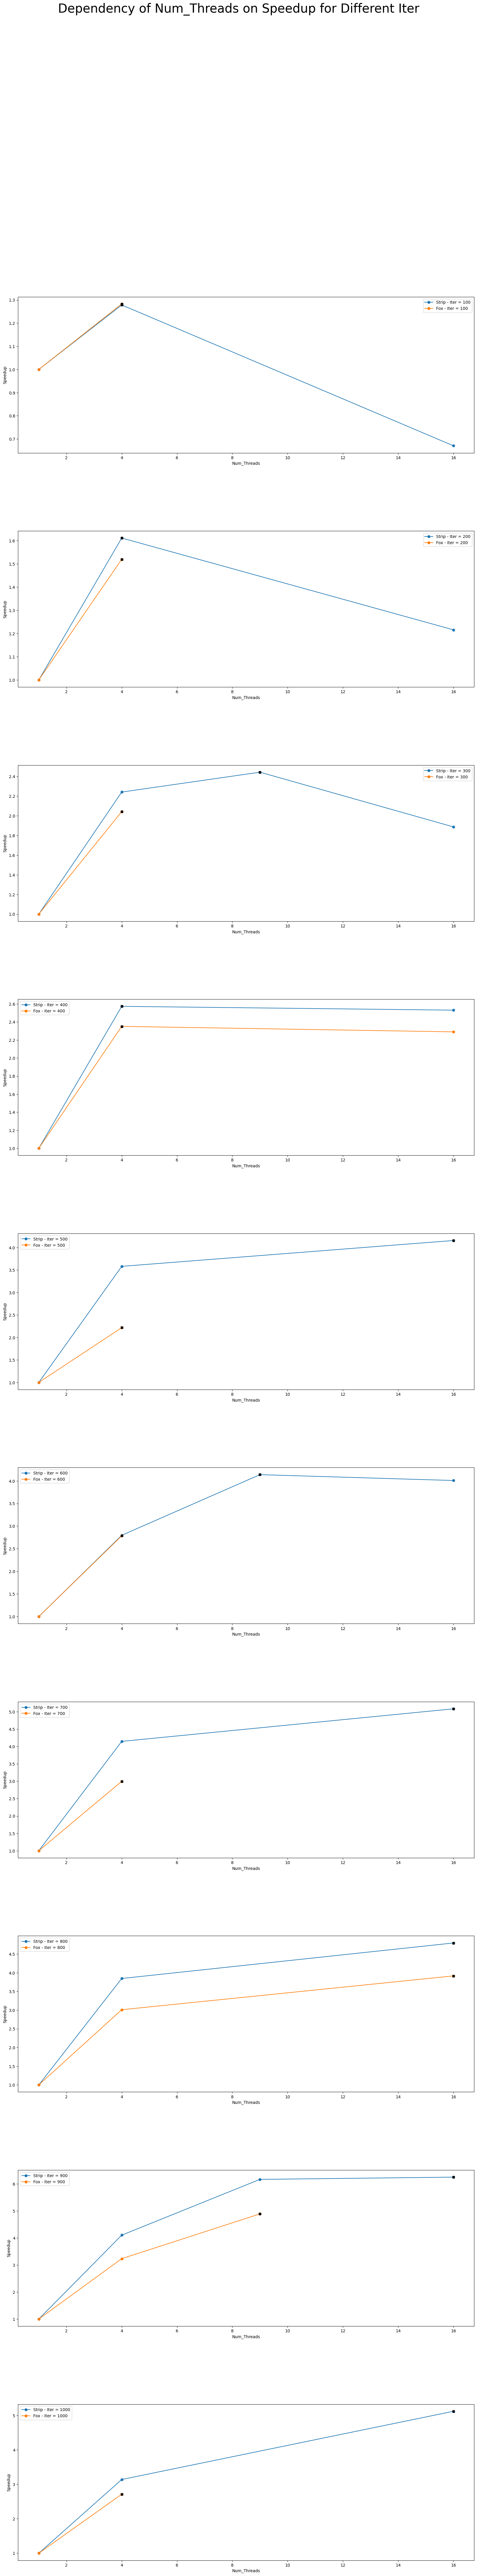

In [23]:
speedup_plot(iter_groups, labels, size=(20, 100))

# Вывод:
Все алгоритмы перемножений матриц имеют одинаковую сложность __O(n^3)__, будь то __последовательный, ленточный, Фокса и др__. Но выполняя перемножение матриц параллельно (особенно если у вас больше одной вычислительной машины), вам необходимо обеспечить наиболее эффективное использование памяти и пересылок данных между всеми процессами. 

У каждого из алгоритмов можно выделить свои преимущества и недостатки, так __ленточный алгоритм__ - в теории, будет всегда чуть более быстрым на матрицах более малой размерности (до какой выяснить не удалось - зависти от вашего железа). Это связанно с количеством осуществляемых пересылок, так-как на каждый процесс __ленточного алгоритма__ посылается лента матрицы А и вся матрица B, в то время как __блочному алгоритму__ для того чтобы осуществить туже работу необходимо совершить в GridSize(размер сетки) больше пересылок. Но __алгоритм Фокса__ однозначно будет более эффективен по памяти, так-как в отличие от ленточного алгоритма, после выполнения операции перемножения для каждого блока он освобождает оперативную память. Другими словами __алгоритм Фокса__ позволяет достичь более высокого уровня дискретизации задачи, что будет более эффективно(с точки зрения используемого железа) при перемножении матриц гипер-больших размеров. 


***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 